In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
wheat = pd.read_csv('wheat_types.txt',sep=';')

In [3]:
data = wheat.iloc[:,0:6].values  #all columns except type column
wheatype = wheat.iloc[:,7].values  #only type column

In [4]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model = model.fit(data,wheatype)

In [5]:
tree.plot_tree(model)

[Text(303.11111111111114, 351.11999999999995, 'X[0] <= 15.37\nentropy = 1.585\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(248.0, 314.15999999999997, 'X[0] <= 13.41\nentropy = 0.992\nsamples = 127\nvalue = [57, 0, 70]'),
 Text(220.44444444444446, 277.2, 'X[5] <= 4.168\nentropy = 0.65\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(192.8888888888889, 240.23999999999998, 'X[0] <= 12.71\nentropy = 0.971\nsamples = 35\nvalue = [14, 0, 21]'),
 Text(137.77777777777777, 203.28, 'X[5] <= 3.24\nentropy = 0.722\nsamples = 25\nvalue = [5, 0, 20]'),
 Text(110.22222222222223, 166.32, 'X[3] <= 5.168\nentropy = 1.0\nsamples = 10\nvalue = [5, 0, 5]'),
 Text(82.66666666666667, 129.36, 'X[0] <= 12.515\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(55.111111111111114, 92.40000000000003, 'X[3] <= 5.102\nentropy = 0.65\nsamples = 6\nvalue = [5, 0, 1]'),
 Text(27.555555555555557, 55.44, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(82.66666666666667, 55.44, 'X[5] <= 1.851\nentropy = 1.0\ns

In [6]:
model.score(data,wheatype)

1.0

In [7]:
x = data
y = wheatype
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=100)

In [8]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
predicted = model.predict(x_test)

In [10]:
conf = confusion_matrix(y_test,predicted)
print(conf)

[[11  0  1]
 [ 3 15  0]
 [ 4  0 19]]


In [11]:
print(accuracy_score(y_test,predicted)) #Accuracy of Decision Tree

0.8490566037735849


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


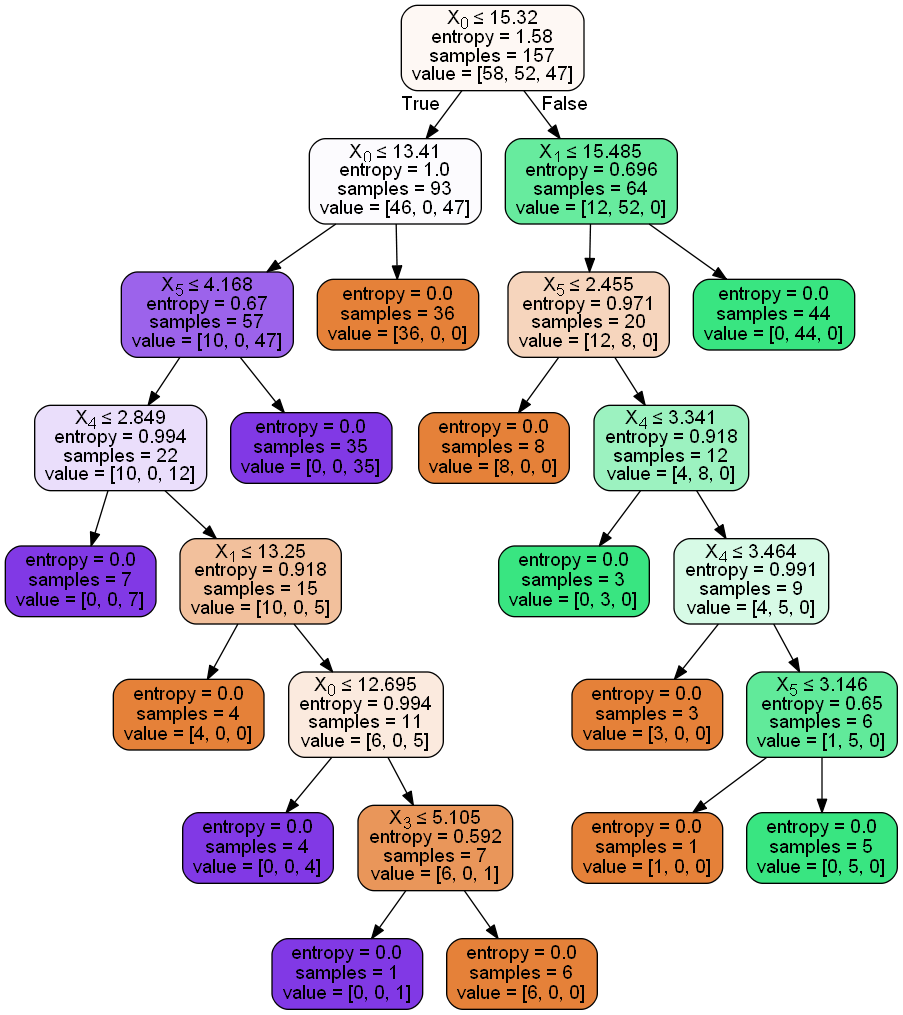

In [12]:
#Visualizing the Decision Tree
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(model, 
 out_file=dot_data, 
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())